In [17]:
#Import Pandas
import pandas as pd

In [18]:
#Change display settings
pd.options.display.max_rows = 200

In [19]:
#Get data: a CSV file of Canada Museum List
museum_df = pd.read_csv(r'C:\Users\ASUS\Desktop\Canada Museum List.csv', delimiter=",", encoding='ISO-8859-1')

In [20]:
#Overview of the dataset
museum_df.sample(10)

,Name,Street Address,City,State,Zipcode,Latitude,Longitude,Category
3629,Atelier-Galerie Pierre-Gilles Martin Et Carole...,90 Rue St-Jean Baptiste,Baie Saint Paul,QC,G3Z 1M6,47.443767,-70.508071,gallery
3978,Mus¨¦e D'Art Contemporain De Montr¨¦al,185 Rue Sainte-Catherine Ouest,Montr¨¦al,QC,H2X 3X5,45.507828,-73.566790,museum
2015,Theatre North West Society,556 Nechako Rd North,Prince George,BC,NaN,53.931093,-122.781391,theatre/performance and concert hall
84,Coll¨¨ge Saint-Alexandre,2425 Rue Saint-Louis,Gatineau,QC,NaN,45.490859,-75.750338,heritage or historic site
4082,Proof Studio Gallery,55 Mill St,Toronto,ON,M5A 3C4,43.650639,-79.359662,gallery
4262,Edmonton Power Historical Foundation,10065 Jasper Avenue,Edmonton,AB,T5J 3B1,53.541584,-113.492740,heritage or historic site
730,Forest Lawn Library,4807 8 Av Se,Calgary,AB,T2A 4M1,51.045105,-113.965202,library or archives
215,Argenteuil Regional Museum,44 Route Du-Long Sault,Saint Andr¨¦ d'Argenteuil,QC,J0V 1X0,45.565124,-74.371852,museum
2753,Bibliotheque Municipale De Saint-Honore-De-Chi...,100 Rue Paul,Saint Honor¨¦,QC,G0V 1L0,48.535137,-71.085517,library or archives
5290,Bibliotheque Saint-Lazare,1275 Rue Du-Bois,Saint Lazare,QC,J7T 3E6,45.395300,-74.141954,library or archives


In [21]:
#Generate information about all the columns in the data
museum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5442 non-null   object 
 1   Street Address  5442 non-null   object 
 2   City            5442 non-null   object 
 3   State           5442 non-null   object 
 4   Zipcode         4639 non-null   object 
 5   Latitude        5442 non-null   float64
 6   Longitude       5442 non-null   float64
 7   Category        5442 non-null   object 
dtypes: float64(2), object(6)
memory usage: 340.3+ KB


In [22]:
#Delete the "Latitude" and "Longitude" columns
museum_df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

# Question 1:How many museums are there in the states of Canada and how are they distributed? #

In [23]:
#Count all the museums in Canada
total_museums_in_canada = len(museum_df)
print("Total number of museums in Canada:", total_museums_in_canada)

Total number of museums in Canada: 5442


In [24]:
#Count the museum number of each state
state_museum_count = museum_df['State'].value_counts()
print(state_museum_count)

QC    1781
ON    1614
BC     777
AB     390
NB     273
NS     212
MB     167
SK     145
NL      53
PE      19
YT       7
NT       3
NU       1
Name: State, dtype: int64


In [25]:
#Install matplotlib
!pip install matplotlib

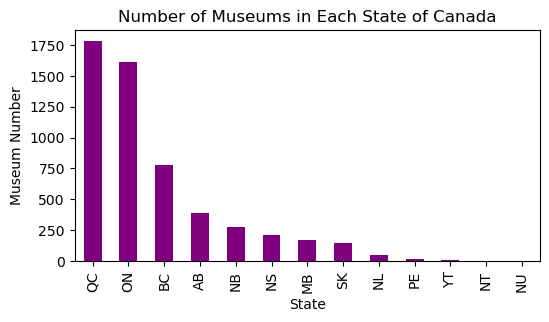

In [26]:
#Visualize the result with a bar plot 
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
state_museum_count.plot(kind='bar', color='purple')
plt.title('Number of Museums in Each State of Canada')
plt.xlabel('State')
plt.ylabel('Museum Number')
plt.show()

# Question 2: Which category of museums has the largest number and what about the distribution?

In [27]:
#Count the number of each category
category_counts = museum_df['Category'].value_counts()
print(category_counts)

library or archives                     1979
museum                                  1326
gallery                                  743
theatre/performance and concert hall     457
heritage or historic site                439
festival site                            275
art or cultural centre                   161
artist                                    62
Name: Category, dtype: int64


In [28]:
#Find the most numerous category
most_common_category = category_counts.idxmax()
print(f"The category of museums with the largest number is: {most_common_category}")

The category of museums with the largest number is: library or archives


In [29]:
#Count the number of each category in each state
category_state_counts = museum_df.groupby(['State', 'Category']).size().reset_index(name='Numbers')

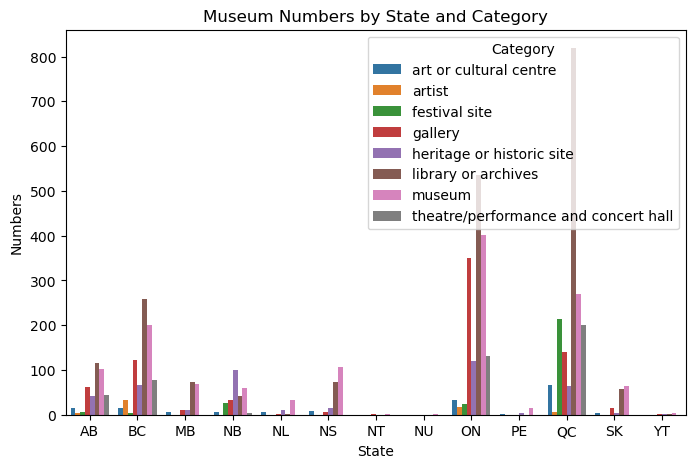

In [30]:
#Draw the bar plot
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x='State', y='Numbers', hue='Category', data=category_state_counts)

plt.title('Museum Numbers by State and Category')
plt.xlabel('State')
plt.ylabel('Numbers')
plt.legend(title='Category', loc='upper right')
plt.show()